In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("Prospect_Emails_Current_Cleaned.csv")

In [52]:
e_count_df = df[['Key', 'Version', 'Timeline (Days after Entering Journey)', 'Email Name']]

In [53]:
e_count_unique = e_count_df.drop_duplicates()

<ipython-input-73-808e3836269e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


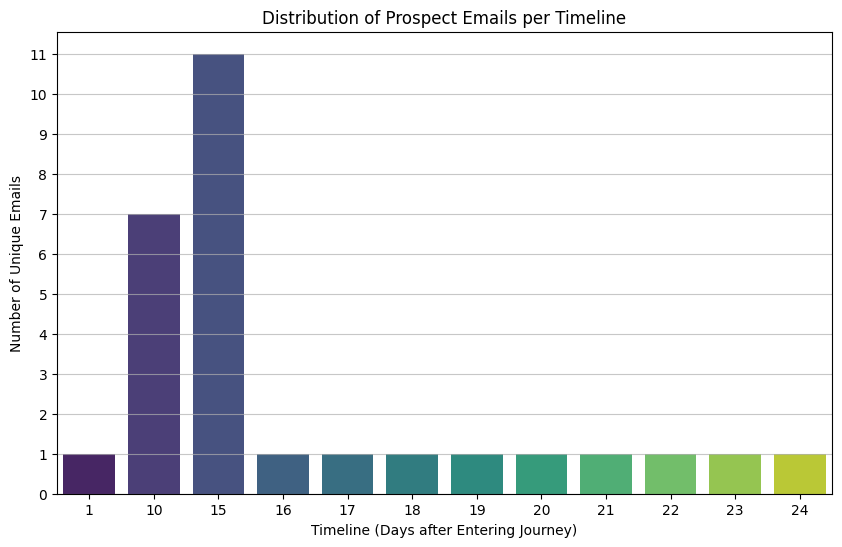

In [73]:
email_distribution = e_count_unique.groupby("Timeline (Days after Entering Journey)")["Email Name"].nunique().reset_index()

# Find the max count to set y-axis ticks
max_count = email_distribution["Email Name"].max()
y_ticks = list(range(0, max_count + 1))  # Ensures all integer counts are displayed

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Timeline (Days after Entering Journey)",
    y="Email Name",
    data=email_distribution,
    palette="viridis"
)

plt.yticks(ticks=y_ticks)
plt.xlabel("Timeline (Days after Entering Journey)")
plt.ylabel("Number of Unique Emails")
plt.title("Distribution of Prospect Emails per Timeline")
plt.grid(axis="y", linestyle="-", alpha=0.7)

plt.show()

<ipython-input-72-5fad6dde8f3d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


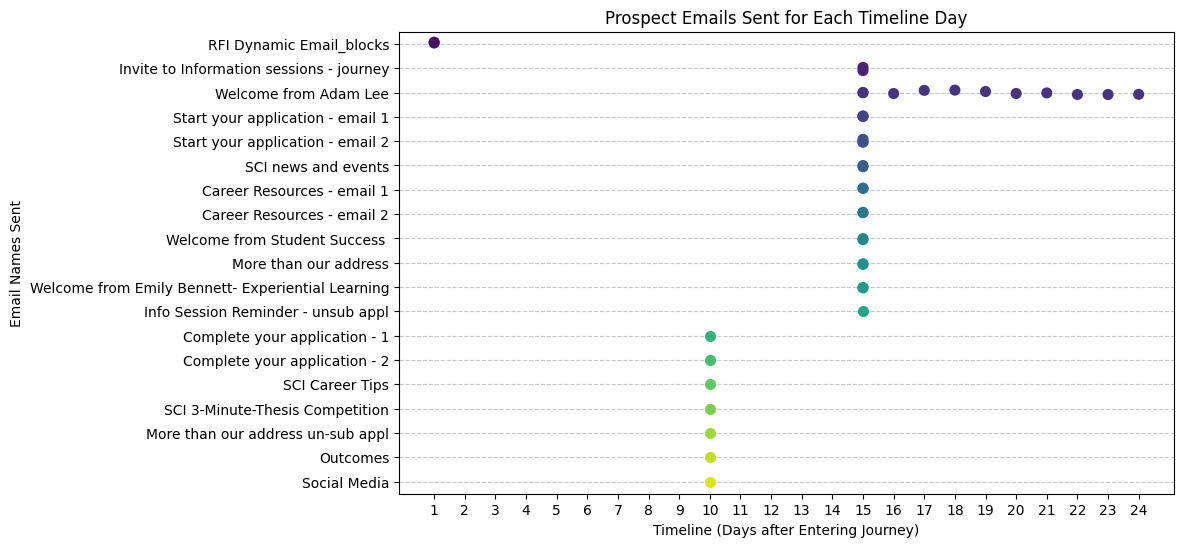

In [72]:
min_timeline = e_count_df["Timeline (Days after Entering Journey)"].min()
max_timeline = e_count_unique["Timeline (Days after Entering Journey)"].max()
all_timelines = list(range(min_timeline, max_timeline + 1))  # Ensure all days are included

# Create the plot
plt.figure(figsize=(10, 6))
sns.stripplot(
    x="Timeline (Days after Entering Journey)",
    y="Email Name",
    data=e_count_unique,
    jitter=True,
    size=8,
    palette="viridis"
)

# Set x-axis ticks to show every timeline value
plt.xticks(ticks=all_timelines, labels=all_timelines)

plt.xlabel("Timeline (Days after Entering Journey)")
plt.ylabel("Email Names Sent")
plt.title("Prospect Emails Sent for Each Timeline Day")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()